<a href="https://colab.research.google.com/github/dclark18/MSDS_Capstone/blob/master/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
female_drive = 'https://drive.google.com/file/d/17fVhjvXH-ckfQM1kY_4CrQH2UDlszY-L/view?usp=sharing'

file_id = female_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
female_clean = pd.read_csv(csv_raw)
female_clean.head()
female_clean = female_clean.iloc[0:22990]
female_clean.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,month,CLUSTER,disagLWM,disagMIN,disagMAX,disagBEG,disagEND,disforLWM,disforMIN,disforMAX,disforBEG,disforEND,disnatLWM,disnatMIN,disnatMAX,disnatBEG,disnatEND,distrdsLWM,distrdsMIN,distrdsMAX,distrdsBEG,distrdsEND,distwatLWM,distwatMIN,distwatMAX,distwatBEG,distwatEND,natden5LWM,natden5MIN,natden5MAX,natden5BEG,natden5END,fordenLWM,fordenMIN,fordenMAX,fordenBEG,fordenEND,rddenLWM,rddenMIN,rddenMAX,rddenBEG,rddenEND,forestLWM,forestMIN,forestMAX,forestBEG,forestEND,naturalLWM,naturalMIN,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
22985,22986.0,4681.0,0.0,375.0,4681.0,-56.424118,234.498194,318.328368,0.0,8/30/2012 0:00,8.0,1,4.309573,0.0,30.000000,30.0,30.0,50.381412,0.0,84.852814,0.0,0.000000,50.381412,0.0,84.852814,0.0,0.000000,6380.917791,6296.427734,6450.000000,6450.0,6296.427734,132.836058,42.426407,210.000000,210.0,42.426407,0.210908,0.205875,0.214006,0.205875,0.213725,0.225380,0.04,0.48,0.48,0.48,0.019083,0.015298,0.022438,0.021928,0.015298,0.143652,0.0,1.0,1.0,1.0,0.143652,0.0,1.0,1.0,1.0,46.071839,-30.000000,84.852814,-30.0,-30.000000,2090.0,-0.640189
22986,22987.0,4682.0,0.0,375.0,4682.0,179.173599,515.164005,193.926086,0.0,8/30/2012 0:00,8.0,1,38.593209,0.0,67.082039,30.0,30.0,6.393206,0.0,42.426407,0.0,42.426407,6.393206,0.0,42.426407,0.0,42.426407,6401.631356,6343.918457,6450.069824,6450.0,6345.975098,469.104718,210.000000,720.000000,210.0,720.000000,0.156871,0.100932,0.205875,0.205875,0.100932,0.624969,0.20,0.80,0.48,0.20,0.024917,0.021928,0.026007,0.021928,0.024987,0.798870,0.0,1.0,1.0,0.0,0.798870,0.0,1.0,1.0,0.0,-31.332584,-67.082039,42.426407,-30.0,42.426407,2090.0,-0.444709
22987,22988.0,4683.0,0.0,375.0,4683.0,-14.217464,3473.900916,0.535023,0.0,8/30/2012 0:00,8.0,1,11.498600,0.0,150.000000,30.0,0.0,242.947041,0.0,600.000000,0.0,600.000000,242.947041,0.0,600.000000,0.0,600.000000,4980.114239,3507.947998,6450.000000,6450.0,3507.947998,1132.051525,0.000000,1867.966797,210.0,1867.966797,0.085732,0.021994,0.216902,0.205875,0.092264,0.147428,0.00,1.00,0.48,0.00,0.008933,0.000000,0.023457,0.021928,0.000000,0.127941,0.0,1.0,1.0,0.0,0.127941,0.0,1.0,1.0,0.0,236.653002,-90.000000,600.000000,-30.0,600.000000,2090.0,-0.017580
22988,22989.0,4684.0,0.0,375.0,4684.0,106.585696,440.587103,121.338182,0.0,8/30/2012 0:00,8.0,1,3.067130,0.0,42.426407,30.0,0.0,131.210272,0.0,212.132034,0.0,189.736664,131.210272,0.0,212.132034,0.0,189.736664,6648.012550,6450.000000,6842.368164,6450.0,6842.368164,251.639161,210.000000,284.604981,210.0,276.586334,0.190226,0.170756,0.206251,0.205875,0.170756,0.112259,0.00,0.56,0.48,0.00,0.023548,0.021928,0.024477,0.021928,0.022438,0.100989,0.0,1.0,1.0,0.0,0.100989,0.0,1.0,1.0,0.0,128.143142,-42.426407,212.132034,-30.0,189.736664,2090.0,-0.114555
22989,22990.0,4685.0,0.0,375.0,4685.0,148.551590,240.630812,163.304076,0.0,8/30/2012 0:00,8.0,1,16.491728,0.0,30.000000,30.0,0.0,21.462339,0.0,90.000000,0.0,90.000000,21.462339,0.0,90.000000,0.0,90.000000,6493.992869,6450.000000,6542.476563,6450.0,6542.476563,310.222342,210.000000,408.044128,210.0,400.249908,0.188504,0.167851,0.205875,0.205875,0.168728,0.421216,0.00,0.56,0.48,0.00,0.024075,0.021928,0.025497,0.021928,0.025497,0.549724,0.0,1.0,1.0,0.0,0.549724,0.0,1.0,1.0,0.0,4.970611,-30.000000,90.000000,-30.0,90.000000,2090.0,-0.290843


In [3]:
male_drive = 'https://drive.google.com/file/d/1lzz2ykpEs8HNPLGUay3S5xI8MVnLVNXY/view?usp=sharing'

file_id = male_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
male_clean = pd.read_csv(csv_raw)
male_clean = male_clean.iloc[0:167057]
male_clean.head()
male_clean.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,month,CLUSTER,disagLWM,disagMIN,disagMAX,disagBEG,disagEND,disforLWM,disforMIN,disforMAX,disforBEG,disforEND,disnatLWM,disnatMIN,disnatMAX,disnatBEG,disnatEND,distrdsLWM,distrdsMIN,distrdsMAX,distrdsBEG,distrdsEND,distwatLWM,distwatMIN,distwatMAX,distwatBEG,distwatEND,natden5LWM,natden5MIN,natden5MAX,natden5BEG,natden5END,fordenLWM,fordenMIN,fordenMAX,fordenBEG,fordenEND,rddenLWM,rddenMIN,rddenMAX,rddenBEG,rddenEND,forestLWM,forestMIN,forestMAX,forestBEG,forestEND,naturalLWM,naturalMIN,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
167052,167053.0,6771.0,0.0,831.0,6771.0,-77.339746,457.878450,166.201538,0.0,41151.5,8.0,-1,818.303440,611.882324,1050.000000,611.882324,1050.000000,128.257179,0.0,212.132034,0.0,150.000000,128.257179,0.0,212.132034,0.0,150.000000,1743.577491,1524.106323,1959.208984,1524.106323,1959.208984,43.786998,0.0,180.000000,90.0,180.000000,0.272780,0.194266,0.327465,0.327465,0.194266,0.097744,0.00,0.76,0.76,0.00,0.069511,0.045385,0.090260,0.09026,0.045385,0.104539,0.0,1.0,1.0,0.0,0.104539,0.0,1.0,1.0,0.0,124.493927,-42.426407,212.132034,-42.426407,150.000000,15187.0,-0.312966
167053,167054.0,6772.0,0.0,831.0,6772.0,33.112707,1513.832435,276.653991,0.0,41151.5,8.0,-1,317.464433,0.000000,658.634949,611.882324,0.000000,19.335120,0.0,67.082039,0.0,42.426407,17.890094,0.0,67.082039,0.0,42.426407,1294.241063,1083.743530,1524.106323,1524.106323,1083.743530,101.628529,0.0,300.000000,90.0,300.000000,0.248384,0.193308,0.327465,0.327465,0.193308,0.484176,0.08,0.96,0.76,0.28,0.049104,0.021928,0.090260,0.09026,0.024987,0.524813,0.0,1.0,1.0,0.0,0.564716,0.0,1.0,1.0,0.0,-6.867719,-84.852814,67.082039,-42.426407,42.426407,15187.0,-0.483855
167054,167055.0,6773.0,0.0,831.0,6773.0,-37.634686,496.507613,205.906598,0.0,41151.5,8.0,-1,841.267481,611.882324,1032.279053,611.882324,1032.279053,137.036936,0.0,305.941162,0.0,276.586334,137.036936,0.0,305.941162,0.0,276.586334,1714.179993,1524.106323,1929.818604,1524.106323,1929.818604,38.211187,0.0,152.970581,90.0,152.970581,0.265255,0.187762,0.327465,0.327465,0.187762,0.166083,0.00,0.76,0.76,0.00,0.062072,0.033656,0.090260,0.09026,0.033656,0.145214,0.0,1.0,1.0,0.0,0.145214,0.0,1.0,1.0,0.0,132.056153,-42.426407,305.941162,-42.426407,276.586334,15187.0,-0.208582
167055,167056.0,6774.0,0.0,831.0,6774.0,-18.001250,341.453471,225.540034,0.0,41151.5,8.0,-1,751.950489,611.882324,898.999451,611.882324,898.999451,46.099398,0.0,174.928558,0.0,174.928558,46.099398,0.0,174.928558,0.0,174.928558,1609.762548,1519.078613,1718.138550,1524.106323,1718.138550,28.544933,0.0,94.868332,90.0,30.000000,0.292625,0.251578,0.327465,0.327465,0.251578,0.345966,0.00,0.84,0.76,0.00,0.074239,0.053034,0.090260,0.09026,0.053034,0.470148,0.0,1.0,1.0,0.0,0.470148,0.0,1.0,1.0,0.0,29.996062,-60.000000,174.928558,-42.426407,174.928558,15187.0,-0.291362
167056,167057.0,6775.0,0.0,831.0,6775.0,-144.759947,588.596818,98.781337,0.0,41151.5,8.0,-1,665.477722,600.000000,807.774719,611.882324,807.774719,13.348508,0.0,42.426407,0.0,30.000000,13.348508,0.0,42.426407,0.0,30.000000,1638.924566,1524.106323,1797.998901,1524.106323,1797.998901,47.866174,0.0,108.166542,90.0,0.000000,0.349664,0.327465,0.366976,0.327465,0.356797,0.571184,0.32,0.80,0.76,0.36,0.093646,0.088220,0.100459,0.09026,0.088220,0.556435,0.0,1.0,1.0,0.0,0.556435,0.0,1.0,1.0,0.0,-9.358880,-60.000000,42.426407,-42.426407,30.000000,15187.0,-0.489409


#### Import the Necessary Code

In [4]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
print(male_clean.shape)


(167057, 69)


### Male clean - Observed vs Random

In [5]:
male_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167057 entries, 0 to 167056
Data columns (total 69 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  167057 non-null  float64
 1   FID         167057 non-null  float64
 2   Id          167057 non-null  float64
 3   Bear_ID     167057 non-null  float64
 4   SAMPLEID    167057 non-null  float64
 5   TURNANGLE   167057 non-null  float64
 6   STEPLENGTH  167057 non-null  float64
 7   BEARING     167057 non-null  float64
 8   OBSERVED    167057 non-null  float64
 9   datetime    167057 non-null  float64
 10  month       167057 non-null  float64
 11  CLUSTER     167057 non-null  object 
 12  disagLWM    167057 non-null  float64
 13  disagMIN    167057 non-null  float64
 14  disagMAX    167057 non-null  float64
 15  disagBEG    167057 non-null  float64
 16  disagEND    167057 non-null  float64
 17  disforLWM   167057 non-null  float64
 18  disforMIN   167057 non-null  float64
 19  di

In [6]:
# Create plots for the top 4 features as found from lab 2
# cost_per_liter_trans, state_bottle_cost_trans, sale_dollars_trans, totalcost_trans
import seaborn as sns
#sns.pairplot(male_clean, height=4, hue= 'OBSERVED', vars = ['TURNANGLE', 'STEPLENGTH', 'BEARING', 'disagLWM', 'disforLWM', 'disnatLWM', 'distrdsLWM', 'distwatLWM', 'natden5LWM', 'fordenLWM', 'rddenLWM', 'forestLWM', 'naturalLWM', 'NatnegLWM'])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0e8cffdb70> (for post_execute):


KeyboardInterrupt: ignored

# MOdeling and Eval 1

In [7]:
male_clean.columns

Index(['Unnamed: 0', 'FID', 'Id', 'Bear_ID', 'SAMPLEID', 'TURNANGLE',
       'STEPLENGTH', 'BEARING', 'OBSERVED', 'datetime', 'month', 'CLUSTER',
       'disagLWM', 'disagMIN', 'disagMAX', 'disagBEG', 'disagEND', 'disforLWM',
       'disforMIN', 'disforMAX', 'disforBEG', 'disforEND', 'disnatLWM',
       'disnatMIN', 'disnatMAX', 'disnatBEG', 'disnatEND', 'distrdsLWM',
       'distrdsMIN', 'distrdsMAX', 'distrdsBEG', 'distrdsEND', 'distwatLWM',
       'distwatMIN', 'distwatMAX', 'distwatBEG', 'distwatEND', 'natden5LWM',
       'natden5MIN', 'natden5MAX', 'natden5BEG', 'natden5END', 'fordenLWM',
       'fordenMIN', 'fordenMAX', 'fordenBEG', 'fordenEND', 'rddenLWM',
       'rddenMIN', 'rddenMAX', 'rddenBEG', 'rddenEND', 'forestLWM',
       'forestMIN', 'forestMAX', 'forestBEG', 'forestEND', 'naturalLWM',
       'naturalMIN', 'naturalMAX', 'naturalBEG', 'naturalEND', 'NatnegLWM',
       'NatnegMIN', 'NatnegMAX', 'NatnegBEG', 'NatnegEND', 'STRATUM', 'resid'],
      dtype='object')

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

cv = StratifiedKFold(n_splits=10)

features = ['TURNANGLE',
       'STEPLENGTH', 'BEARING', 'datetime', 'month', 
       'disagLWM', 'disagMIN', 'disagMAX', 'disagBEG', 'disagEND', 'disforLWM',
       'disforMIN', 'disforMAX', 'disforBEG', 'disforEND', 'disnatLWM',
       'disnatMIN', 'disnatMAX', 'disnatBEG', 'disnatEND', 'distrdsLWM',
       'distrdsMIN', 'distrdsMAX', 'distrdsBEG', 'distrdsEND', 'distwatLWM',
       'distwatMIN', 'distwatMAX', 'distwatBEG', 'distwatEND', 'natden5LWM',
       'natden5MIN', 'natden5MAX', 'natden5BEG', 'natden5END', 'fordenLWM',
       'fordenMIN', 'fordenMAX', 'fordenBEG', 'fordenEND', 'rddenLWM',
       'rddenMIN', 'rddenMAX', 'rddenBEG', 'rddenEND', 'forestLWM',
       'forestMIN', 'forestMAX', 'forestBEG', 'forestEND', 'naturalLWM',
       'naturalMIN', 'naturalMAX', 'naturalBEG', 'naturalEND', 'NatnegLWM',
       'NatnegMIN', 'NatnegMAX', 'NatnegBEG', 'NatnegEND']

X2 = male_clean[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= male_clean[['OBSERVED']].copy()

CPU times: user 190 ms, sys: 52.1 ms, total: 243 ms
Wall time: 243 ms


In [9]:
from sklearn import metrics as mt

# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [11]:
pip install imblearn

In [13]:
#print("Before OverSampling, counts of label 'Observed': {}".format(sum(y1_train['OBSERVED'] == "1")))
#print("Before OverSampling, counts of label 'Random': {} \n".format(sum(y1_train['OBSERVED'] == "0"))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 

After OverSampling, the shape of train_X: (242816, 60)
After OverSampling, the shape of train_y: (242816,) 



In [14]:
X2.columns
X1DF = pd.DataFrame(X1_train_res, columns =X2.columns)

In [15]:
print(y1_train_res.shape)
ydf = pd.DataFrame(y1_train_res)

(242816,)


### Dimensionality Reduction

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X1_train_res, y1_train_res)
#X_test = lda.transform(X_test)
lda.explained_variance_ratio_

array([1.])

In [17]:
X_train_lda.shape


(242816, 1)

In [18]:
X_train_lda


array([[ 0.51221767],
       [-1.30865401],
       [ 0.20964833],
       ...,
       [ 0.84336813],
       [ 0.27932926],
       [-1.42576686]])

In [20]:
X_train_ldadf=pd.DataFrame(X_train_lda)
X_train_ldadf.columns=['First Component']

In [21]:
ldaydf = X_train_ldadf.merge(ydf, left_index=True, right_index=True)


#### PCA

In [22]:
to_keep=['TURNANGLE',
       'STEPLENGTH', 'BEARING', 'datetime', 'month', 
       'disagLWM', 'disagMIN', 'disagMAX', 'disagBEG', 'disagEND', 'disforLWM',
       'disforMIN', 'disforMAX', 'disforBEG', 'disforEND', 'disnatLWM',
       'disnatMIN', 'disnatMAX', 'disnatBEG', 'disnatEND', 'distrdsLWM',
       'distrdsMIN', 'distrdsMAX', 'distrdsBEG', 'distrdsEND', 'distwatLWM',
       'distwatMIN', 'distwatMAX', 'distwatBEG', 'distwatEND', 'natden5LWM',
       'natden5MIN', 'natden5MAX', 'natden5BEG', 'natden5END', 'fordenLWM',
       'fordenMIN', 'fordenMAX', 'fordenBEG', 'fordenEND', 'rddenLWM',
       'rddenMIN', 'rddenMAX', 'rddenBEG', 'rddenEND', 'forestLWM',
       'forestMIN', 'forestMAX', 'forestBEG', 'forestEND', 'naturalLWM',
       'naturalMIN', 'naturalMAX', 'naturalBEG', 'naturalEND', 'NatnegLWM',
       'NatnegMIN', 'NatnegMAX', 'NatnegBEG', 'NatnegEND']
male_clean2=X1DF[to_keep]
male_clean2.columns.values
from sklearn.decomposition import PCA 
pca = PCA(3)  
projected = pca.fit_transform(male_clean2)
print(X1DF.shape)
print(projected.shape)

(242816, 60)
(242816, 3)


In [24]:

from sklearn.decomposition import PCA 
pcax = PCA(3)  
projected = pcax.fit_transform(male_clean2)
pcax.explained_variance_ratio_

array([0.32171357, 0.1203751 , 0.08913762])

In [25]:
X_train_pcadf=pd.DataFrame(projected)
X_train_pcadf.columns=['First Component','Second Component', 'Third Component']

pcaydf = X_train_pcadf.merge(ydf, left_index=True, right_index=True)

In [26]:
pcaydf = pcaydf.rename(columns={0: 'OBSERVED'})


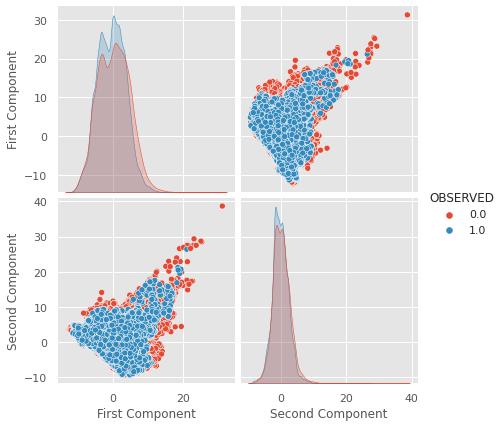

In [27]:
import seaborn as sns
sns.pairplot(pcaydf, height=3, hue= 'OBSERVED', vars = ['First Component', 'Second Component'])

In [28]:
X1P = pcaydf['First Component']
Y1P = pcaydf['Second Component'] 
Z1P = pcaydf['Third Component']
L1P = pcaydf['OBSERVED'].astype(int)

Text(0.5, 0.92, 'PCA data exploration')

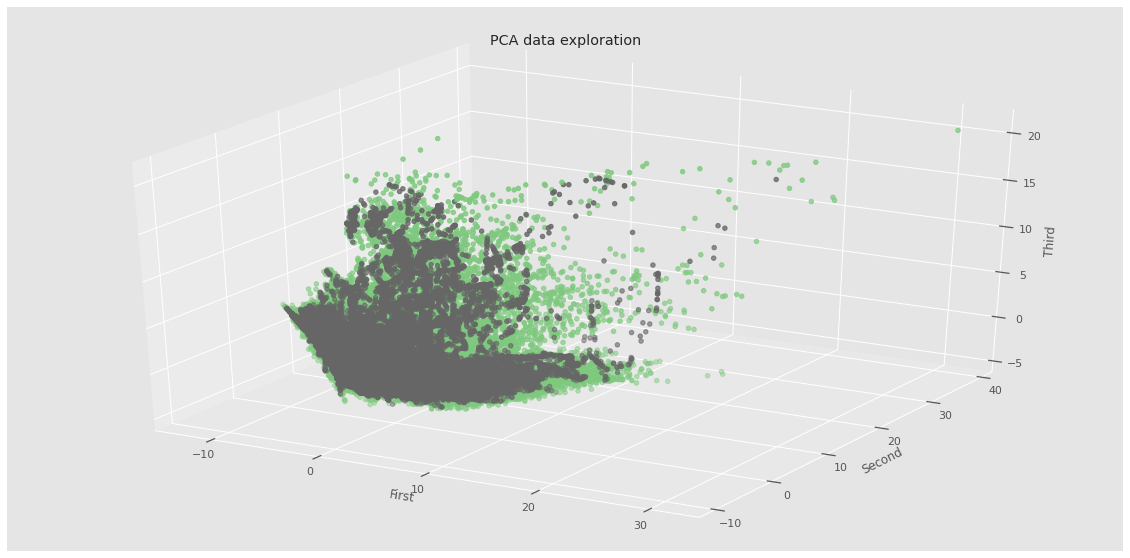

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1P, Y1P, Z1P, c=L1P, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('PCA data exploration')

### CLUSTERING WITH PCA

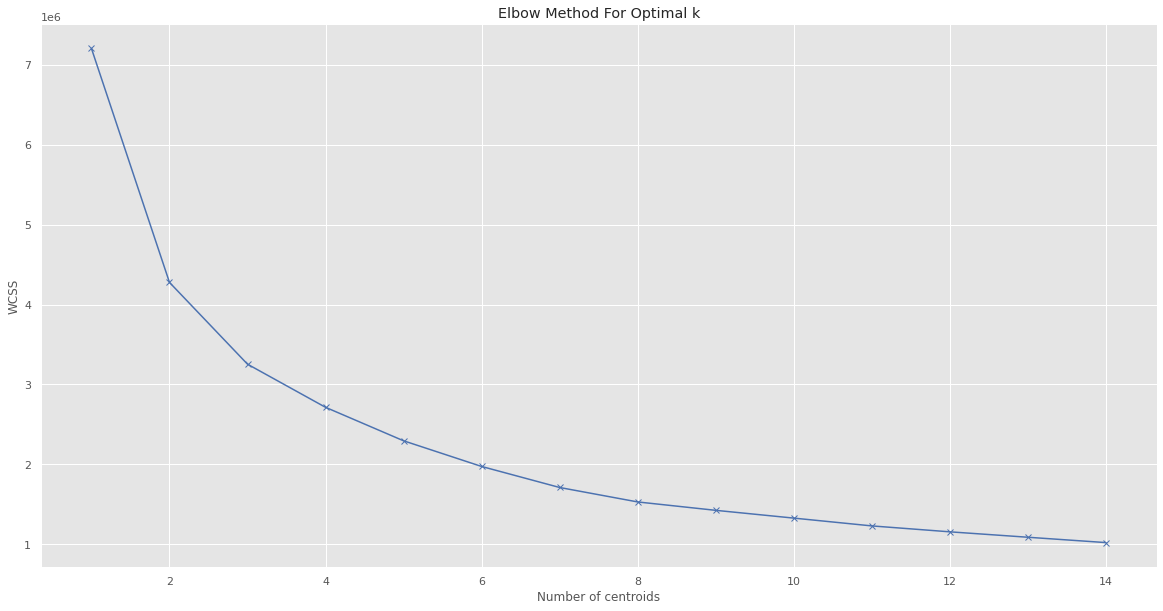

In [30]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:

from sklearn.cluster import KMeans

#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First Component','Second Component', 'Third Component']
#build our algorithm with k=2, train it on pca and make predictions
kmeansx = KMeans(n_clusters=2, init='k-means++', random_state=0)
kmeansx.fit(pca)
y_kmeans = kmeansx.predict(pca)
newfeature = kmeansx.labels_


X1CV = np.column_stack((pca,pd.get_dummies(newfeature)))
#plotting the results 
#plt.scatter(pca['First Component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeansx.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

In [32]:
centers

array([[-3.62999568,  0.21902912, -0.11059332],
       [ 3.30737765, -0.19956277,  0.10076428]])

In [33]:
X1P = pcaydf['First Component']
Y1P = pcaydf['Second Component'] 
Z1P = pcaydf['Third Component']
L1P = y_kmeans

Text(0.5, 0.92, 'PCA Clustering with basic Kmeans')

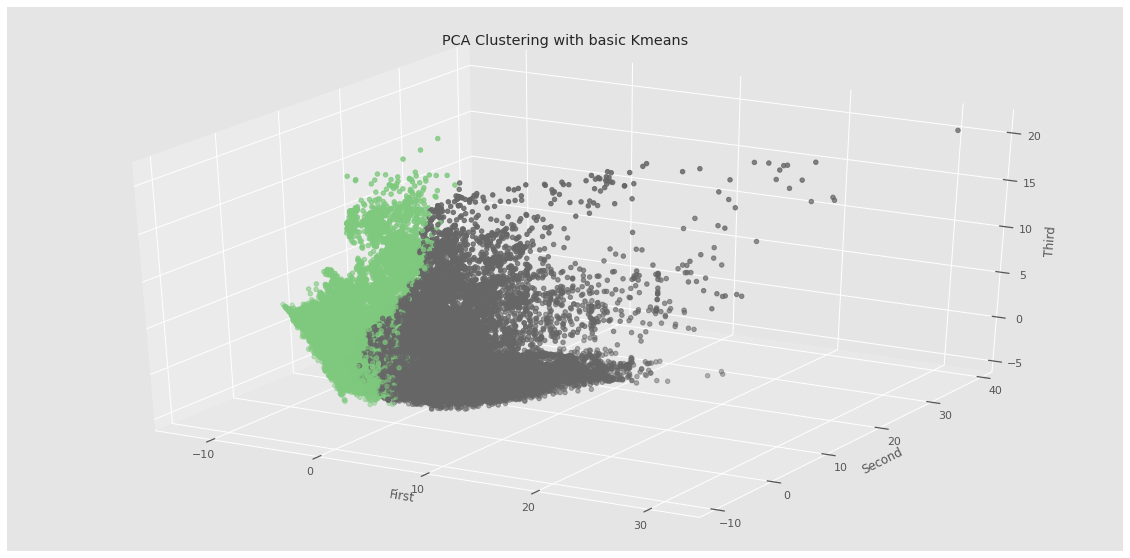

In [34]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1P, Y1P, Z1P, c=L1P, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('PCA Clustering with basic Kmeans')

In [35]:
from sklearn.metrics import silhouette_score

# Get silhouette score
knnb_sil = silhouette_score(pcaydf, L1P, random_state=123456789)
print("Average KNN Silhouette Score:", knnb_sil)

Average KNN Silhouette Score: 0.36640723914762935


In [36]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First Component','Second Component', 'Third Component']
#pca = pca.drop('Third Component', axis=1)
pca

,First Component,Second Component,Third Component
0,-3.638473,4.050104,7.895790
1,5.331547,-1.341138,-0.631850
2,0.464042,-2.201951,-0.321708
3,-3.936835,0.911832,2.757202
4,5.318079,1.799161,-1.451438
...,...,...,...
242811,-3.866570,-2.302040,0.354339
242812,-0.022118,-1.981166,-0.273110
242813,0.961695,-0.606303,-1.708056
242814,-0.936849,-0.771382,-0.334078


In [ ]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X1_N = 100
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(pca.values, X1_N, mode='distance') # calculate distance to four nearest neighbors


N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1, sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()